# Преобразование из RGB в HSV

### Импорт библиотек

In [30]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Функция для выполнения преобразования

In [ ]:
def rgb_to_hsv(image):

    # Нормализуем компоненты RGB к диапазону [0, 1]
    r, g, b = image[:,:,0]/255.0, image[:,:,1]/255.0, image[:,:,2]/255.0
    
    # Вычисляем максимальное и минимальное значения
    c_max = np.maximum(np.maximum(r, g), b)
    c_min = np.minimum(np.minimum(r, g), b)
    
    # Вычисляем разницу delta
    delta = c_max - c_min
    
    # Инициализируем массивы для H, S, V
    h = np.zeros_like(c_max)
    s = np.zeros_like(c_max)
    v = c_max.copy()  # Шаг 6: Яркость V равна Cmax
    
    # Вычисляем оттенок H

    # 1. Случай когда Cmax = r
    mask_r = (delta != 0) & (c_max == r)
    h[mask_r] = 60 * (((g[mask_r] - b[mask_r]) / delta[mask_r]) % 6)
    
    # 2. Случай когда Cmax = g
    mask_g = (delta != 0) & (c_max == g)
    h[mask_g] = 60 * (((b[mask_g] - r[mask_g]) / delta[mask_g]) + 2)
    
    # 3. Случай когда Cmax = b
    mask_b = (delta != 0) & (c_max == b)
    h[mask_b] = 60 * (((r[mask_b] - g[mask_b]) / delta[mask_b]) + 4)
    
    # 4. Когда delta = 0, H остается 0
    
    # Нормализуем H к диапазону [0, 360]
    h = h % 360
    
    # Вычисляем насыщенность S
    mask_nonzero = c_max != 0
    s[mask_nonzero] = delta[mask_nonzero] / c_max[mask_nonzero]
    
    # Собираем результат в HSV изображение
    hsv_image = np.stack([h, s, v], axis=2)
    
    return hsv_image


Подготовим изображение для проверки работы функции

(-0.5, 511.5, 511.5, -0.5)

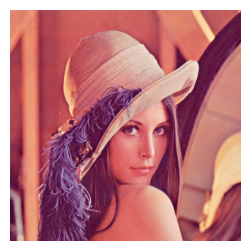

In [41]:
lena = cv2.imread('lena.jpg')
    
# Конвертируем из BGR (OpenCV) в RGB (matplotlib)
lena_rgb = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(3, 3))
plt.imshow(lena_rgb)
plt.axis('off')

Проверим работу функции на изображении

In [42]:
hsv_image = rgb_to_hsv(lena_rgb)
    
print(f"\nРазмер исходного изображения: {lena_rgb.shape}")
print(f"Размер HSV изображения: {hsv_image.shape}")
print(f"Диапазон H: [{hsv_image[:,:,0].min():.1f}, {hsv_image[:,:,0].max():.1f}]")
print(f"Диапазон S: [{hsv_image[:,:,1].min():.2f}, {hsv_image[:,:,1].max():.2f}]")
print(f"Диапазон V: [{hsv_image[:,:,2].min():.2f}, {hsv_image[:,:,2].max():.2f}]")



Размер исходного изображения: (512, 512, 3)
Размер HSV изображения: (512, 512, 3)
Диапазон H: [0.0, 359.6]
Диапазон S: [0.02, 1.00]
Диапазон V: [0.19, 1.00]


Теперь посмотрим результаты для встроенного в библиотеку преобразования. 

OpenCV хранит HSV в другом формате:
* H: [0, 179] (вместо [0, 359])
* S: [0, 255] (вместо [0, 1])  
* V: [0, 255] (вместо [0, 1])
    
Приведем к одинаковому формату для сравнения

In [48]:
hsv_image_opencv = cv2.cvtColor(lena_rgb, cv2.COLOR_RGB2HSV)


hsv_opencv_normalized = hsv_image_opencv.astype(np.float32)
hsv_opencv_normalized[:,:,0] = hsv_opencv_normalized[:,:,0] * 2 
hsv_opencv_normalized[:,:,1] = hsv_opencv_normalized[:,:,1] / 255
hsv_opencv_normalized[:,:,2] = hsv_opencv_normalized[:,:,2] / 255  
    
# Вычисляем разницу
difference = np.abs(hsv_image - hsv_opencv_normalized)
print(f"\nРазмер исходного изображения: {lena_rgb.shape}")
print(f"Размер HSV изображения: {hsv_opencv_normalized.shape}")
print(f"Диапазон H: [{hsv_opencv_normalized[:,:,0].min():.1f}, {hsv_opencv_normalized[:,:,0].max():.1f}]")
print(f"Диапазон S: [{hsv_opencv_normalized[:,:,1].min():.2f}, {hsv_opencv_normalized[:,:,1].max():.2f}]")
print(f"Диапазон V: [{hsv_opencv_normalized[:,:,2].min():.2f}, {hsv_opencv_normalized[:,:,2].max():.2f}]")



Размер исходного изображения: (512, 512, 3)
Размер HSV изображения: (512, 512, 3)
Диапазон H: [0.0, 358.0]
Диапазон S: [0.02, 1.00]
Диапазон V: [0.19, 1.00]


Все правильно работает, небольшое различие в H - нормальная погрешность для разных реализаций алгоритма.